In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)





In [13]:
%matplotlib inline

In [2]:
complete_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
complete_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
complete_mouse_data["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df= complete_mouse_data[complete_mouse_data[["Mouse ID", "Timepoint"]].duplicated()== True]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df= complete_mouse_data.loc[complete_mouse_data["Mouse ID"]== "g989"]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
complete_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_mouse_data.rename(columns= {"Mouse ID":"Mouse_ID"}, inplace= True )
clean_mouse_data= complete_mouse_data[complete_mouse_data.Mouse_ID != 'g989']
clean_mouse_data.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse_ID"].nunique()


248

In [10]:
mean_tumor_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_stdev = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_error = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
summary_data= {"Mean Tumor Volume": mean_tumor_volume,
              "Median Tumor Volume": median_tumor_volume,
              "Tumor Volume Variance": tumor_volume_variance,
              "Tumor Volume Std. Dev.": tumor_volume_stdev,
              "Tumor Volume Std. Err.": tumor_volume_error}
summary_df = pd.DataFrame(summary_data)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


KeyError: 'Tumor Volume (mm3)'

In [24]:
drug_type= complete_mouse_data.groupby(["Drug Regimen"])["Timepoint"].count()
drug_types=drug_type.sort_values( ascending=False )


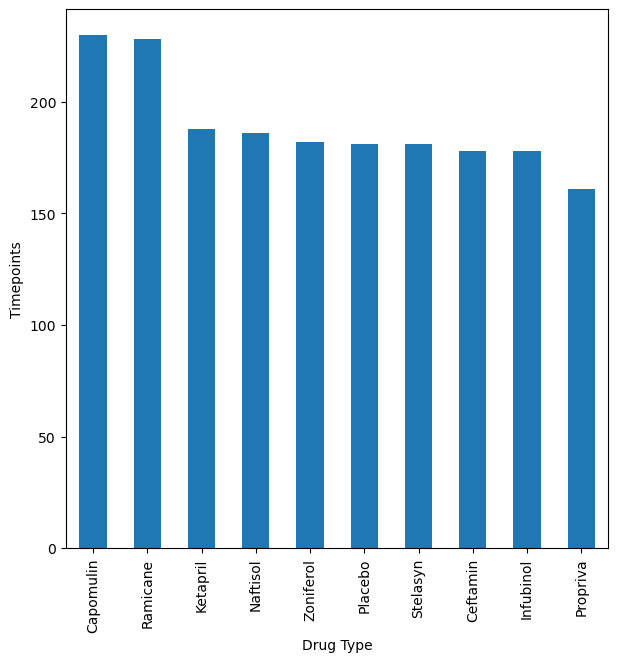

<Figure size 640x480 with 0 Axes>

In [27]:
# Create a bar chart based off of the group series from before
count_chart= drug_types.plot(kind='bar', figsize=(7,7,))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Type")
count_chart.set_ylabel("Timepoints")

plt.show()
plt.tight_layout()

In [29]:
# Set x axis and tick locations
x_axis = complete_mouse_data["Drug Regimen"]
tick_locations = [value for value in x_axis]

In [30]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis, complete_mouse_data["Timpoints"], color='b', alpha=0.9, align="center")
plt.xticks(tick_locations, complete_mouse_data["Drug Regimen"], rotation="vertical")
plt.show()

KeyError: 'Timpoints'

<Figure size 1000x400 with 0 Axes>